In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt


# MNIST dataset load
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Data preprocessing
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# Model architecture defining
model = keras.Sequential(
    [
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation="relu"),
        layers.Dense(10, activation="softmax"),
    ]
)
model.summary()

11490434/11490434 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-train

In [2]:
# SGD optimizer
model.compile(loss="categorical_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=0.01), metrics=["accuracy"])

# Model training
history_sgd = model.fit(x_train, y_train, batch_size=128, epochs=20, validation_data=(x_test, y_test))

# ADAM optimizer
model.compile(loss="categorical_crossentropy", optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

# Model training
history_adam = model.fit(x_train, y_train, batch_size=128, epochs=20, validation_data=(x_test, y_test))

# RMSprop optimizer
model.compile(loss="categorical_crossentropy", optimizer=keras.optimizers.RMSprop(learning_rate=0.001), metrics=["accuracy"])

# Model training
history_rmsprop = model.fit(x_train, y_train, batch_size=128, epochs=20, validation_data=(x_test, y_test))


Epoch 1/20
469/469 [==============================] - 36s 75ms/step - loss: 0.9377 - accuracy: 0.7697 - val_loss: 0.3676 - val_accuracy: 0.8979
Epoch 2/20
469/469 [==============================] - 32s 68ms/step - loss: 0.3423 - accuracy: 0.9020 - val_loss: 0.2874 - val_accuracy: 0.9174
Epoch 3/20
469/469 [==============================] - 34s 73ms/step - loss: 0.2904 - accuracy: 0.9157 - val_loss: 0.2530 - val_accuracy: 0.9282
Epoch 4/20
469/469 [==============================] - 34s 73ms/step - loss: 0.2566 - accuracy: 0.9257 - val_loss: 0.2319 - val_accuracy: 0.9327
Epoch 5/20
469/469 [==============================] - 32s 68ms/step - loss: 0.2310 - accuracy: 0.9326 - val_loss: 0.2050 - val_accuracy: 0.9408
Epoch 6/20
469/469 [==============================] - 33s 70ms/step - loss: 0.2103 - accuracy: 0.9392 - val_loss: 0.1902 - val_accuracy: 0.9451
Epoch 7/20
469/469 [==============================] - 32s 69ms/step - loss: 0.1936 - accuracy: 0.9435 - val_loss: 0.1789 - val_accuracy:

313/313 [==============================] - 2s 7ms/step - loss: 0.0548 - accuracy: 0.9889
Test accuracy: 0.9889000058174133


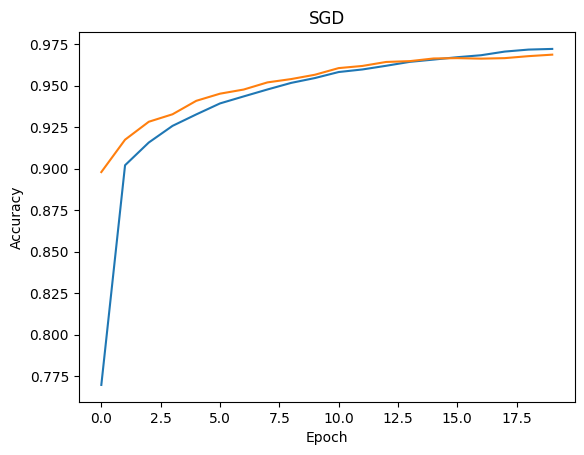

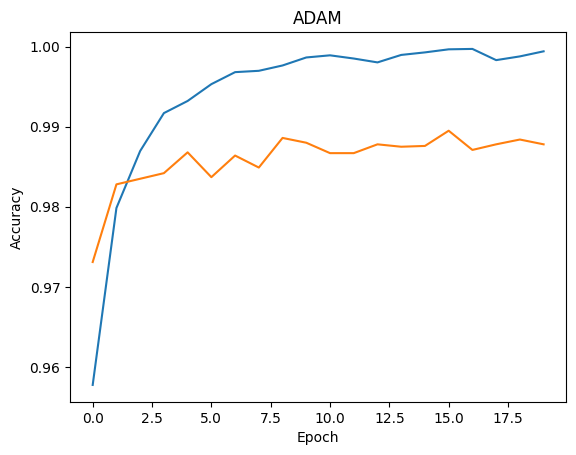

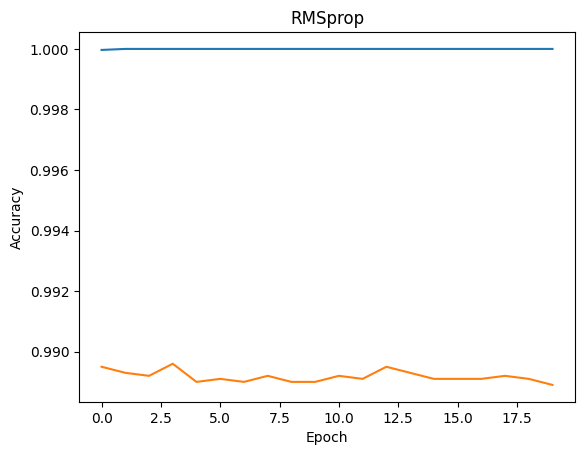

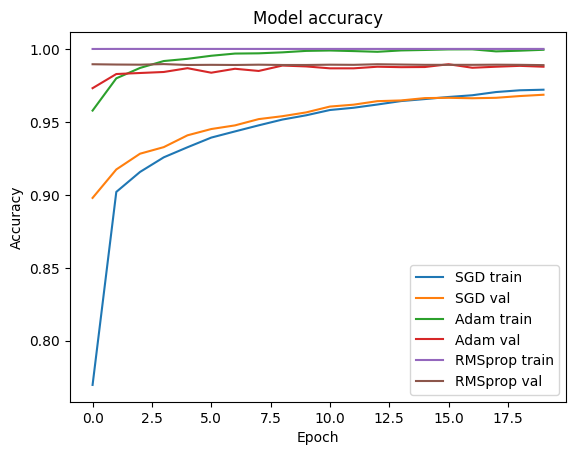

In [3]:
test_loss, test_acc = model.evaluate(x_test, y_test)

# test accuracy
print("Test accuracy:", test_acc)

# training accuracy and validation accuracy plotting
plt.title("SGD")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.plot(history_sgd.history["accuracy"])
plt.plot(history_sgd.history["val_accuracy"])
plt.show()
plt.title("ADAM")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.plot(history_adam.history["accuracy"])
plt.plot(history_adam.history["val_accuracy"])
plt.show()
plt.title("RMSprop")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.plot(history_rmsprop.history["accuracy"])
plt.plot(history_rmsprop.history["val_accuracy"])
plt.show()

plt.plot(history_sgd.history["accuracy"])
plt.plot(history_sgd.history["val_accuracy"])

plt.plot(history_adam.history["accuracy"])
plt.plot(history_adam.history["val_accuracy"])

plt.plot(history_rmsprop.history["accuracy"])
plt.plot(history_rmsprop.history["val_accuracy"])

plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["SGD train", "SGD val", "Adam train", "Adam val", "RMSprop train", "RMSprop val"], loc="best")
plt.show()